In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
print(plt.style.available)
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


1. 0から10までの`x`の値に対して、等間隔の浮動小数点数の値を生成します。このデータは、線形回帰のためのデータとして使用されます。

In [2]:
x = np.linspace(0, 10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

2. 関連するすべての乱数生成器をシード化します。これにより、再現性が保証されます。

In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)

set_seeds()

3. ランダムな`y`の値を生成します。これは、線形回帰のためのデータとして使用されます。

In [4]:
y = x + np.random.standard_normal(len(x))

4. 1次のOLS回帰(線形回帰)を行います。

In [5]:
reg = np.polyfit(x, y, deg=1)

In [6]:
reg

array([0.94612934, 0.22855261])

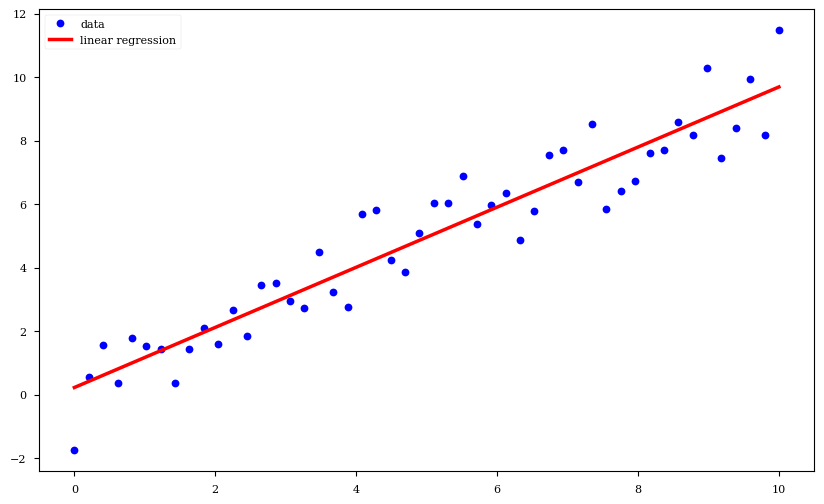

In [7]:
plt.figure(figsize=(10, 6))

# Plot the data as a scatter plot
plt.plot(x, y, 'bo', label='data')

# Plot the regression line
plt.plot(x, np.polyval(reg, x), 'r',
            lw=2.5, label='linear regression')
plt.legend(loc=0)
plt.show()

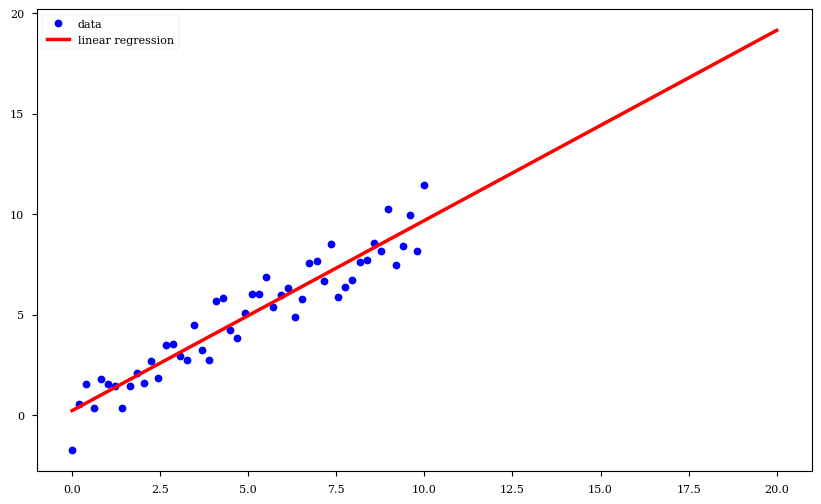

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0);

In [9]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
lags = 3

In [11]:
m = np.zeros((lags + 1, len(x) - lags))
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [13]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [14]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [15]:
# 最小二乗法(OLS; Ordinary Least Squares)
# 線形OLS回帰
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [16]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [17]:
import pandas as pd

In [18]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                    index_col=0, parse_dates=True).dropna()

In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [20]:
symbol = 'EUR='

In [21]:
data = pd.DataFrame(raw[symbol])

In [22]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [23]:
lags = 5

In [24]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)

data.dropna(inplace=True)

In [25]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [26]:
data['prediction'] = np.dot(data[cols], reg)

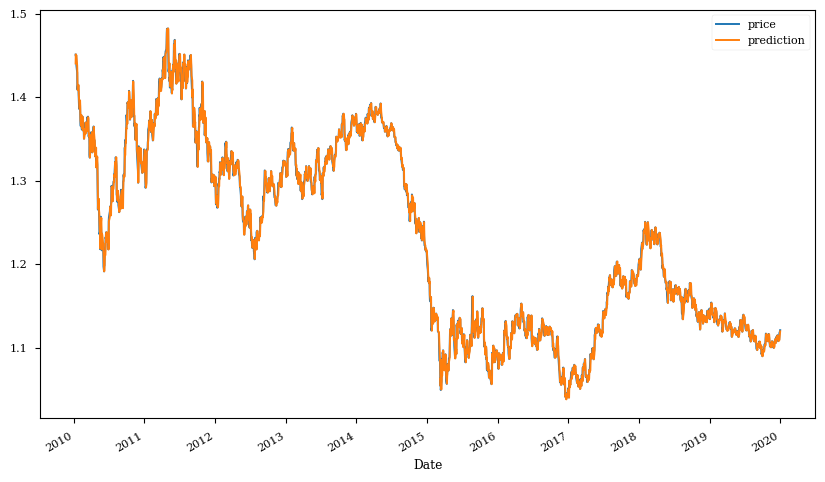

In [27]:
data[['price', 'prediction']].plot(figsize=(10, 6));

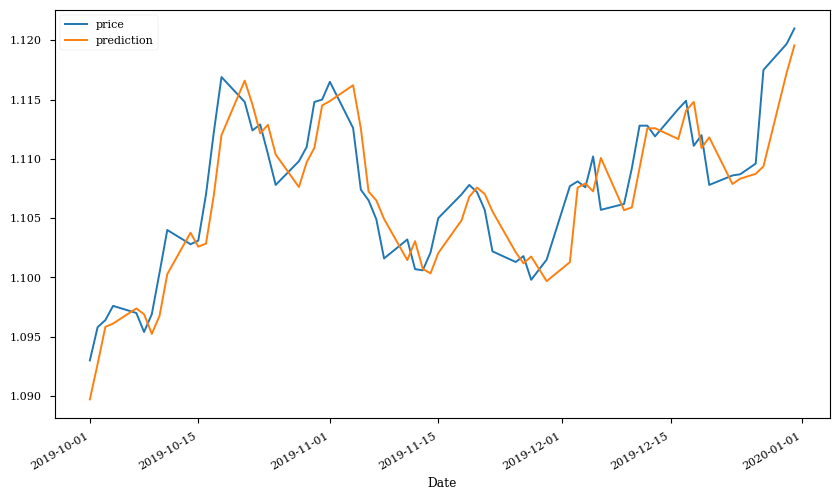

In [28]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6));

In [29]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [30]:
data.dropna(inplace=True)

In [31]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['returns'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [32]:
reg = np.linalg.lstsq(data[cols], data['returns'], rcond=None)[0]
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [33]:
data['prediction'] = np.dot(data[cols], reg)

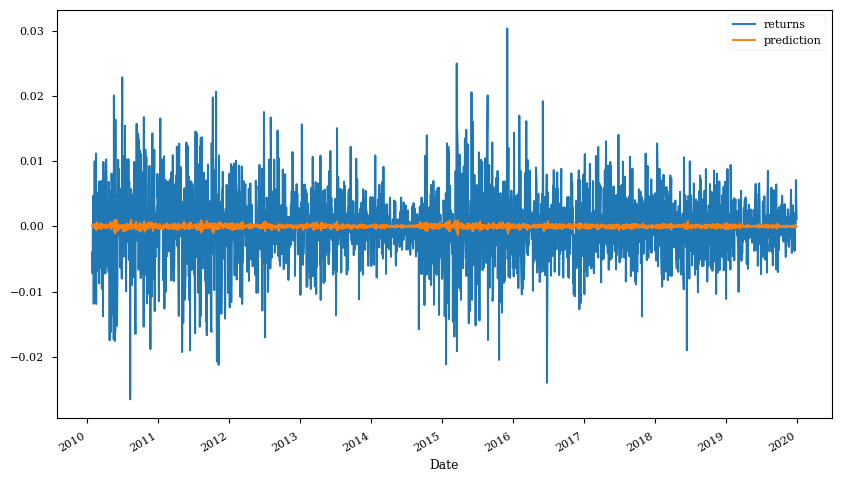

In [34]:
data[['returns', 'prediction']].iloc[lags:].plot(figsize=(10, 6));

In [35]:
hits = np.sign(data['prediction'] * data['returns']).value_counts()
hits

 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

In [36]:
hits.values[0] / sum(hits)

0.499001996007984

In [37]:
reg = np.linalg.lstsq(data[cols], np.sign(data['returns']), rcond=None)[0]
reg

array([-5.11938725, -2.24077248, -5.13080606, -3.03753232, -2.14819119])

In [38]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [39]:
data['prediction'].value_counts()

 1.0    1300
-1.0    1205
Name: prediction, dtype: int64

In [40]:
hits = np.sign(data['prediction'] * data['returns']).value_counts()
hits

 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

In [41]:
hits.values[0] / sum(hits)

0.5193612774451097

In [42]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,returns
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.0,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.0,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.0,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.0,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.0,-0.005457


In [43]:
data['strategy'] = data['prediction'] * data['returns']

In [44]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.784026
strategy    1.654154
dtype: float64

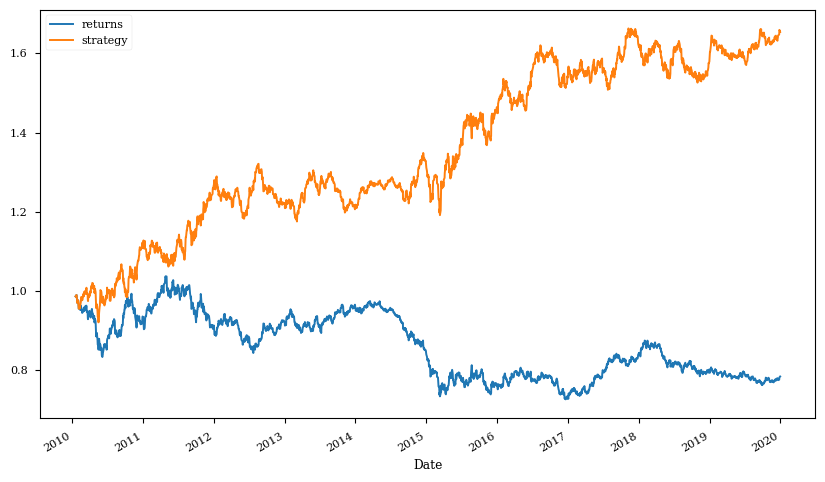

In [45]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [46]:
from linear_regression_strategy import LRVectorBacktester as LRVB

In [47]:
lrbt = LRVB(symbol='EUR=', start='2010-01-01', end='2019-12-31', amount=10000, tc=0.0)

In [48]:
lrbt.run_strategy('2010-01-01', '2019-12-31',
                '2010-01-01', '2019-12-31', lags=5)

(17166.53, 9442.42)

In [49]:
lrbt.run_strategy('2010-01-01', '2017-12-31',
                '2018-01-01', '2019-12-31', lags=5)

(10160.86, 791.87)

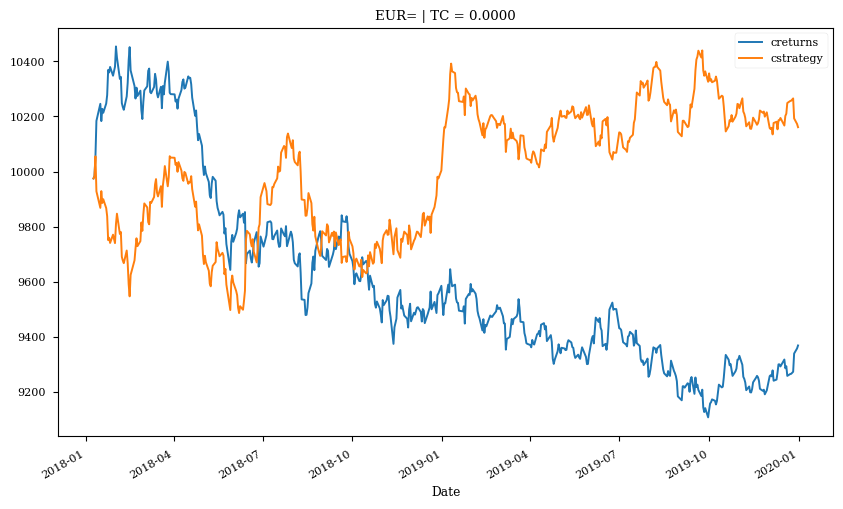

In [50]:
lrbt.plot_results()

In [51]:
lrbt = LRVB(symbol='GDX', start='2010-01-01', end='2019-12-31',
            amount=10000, tc=0.002)

In [52]:
lrbt.run_strategy('2010-01-01', '2019-12-31',
                '2010-01-01', '2019-12-31', lags=7)

(23642.32, 17649.69)

In [53]:
lrbt.run_strategy('2010-01-01', '2014-12-31',
                '2015-01-01', '2019-12-31', lags=7)

(28513.35, 14888.41)

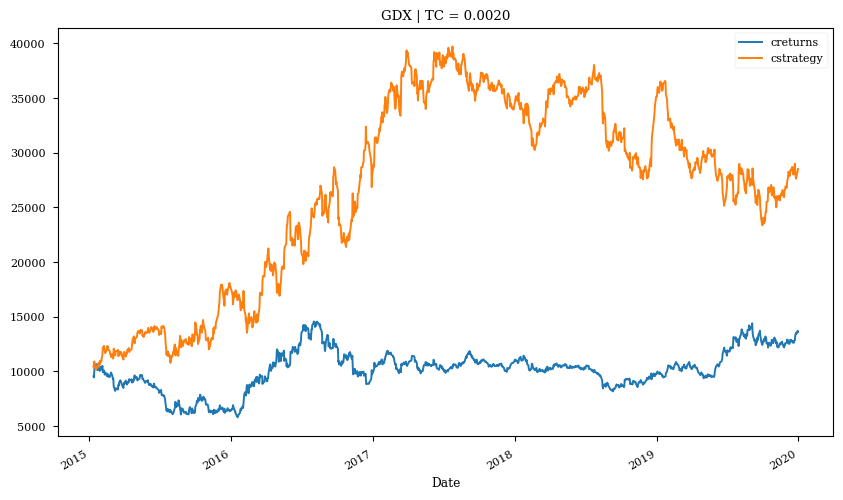

In [54]:
lrbt.plot_results()

### scikit-learn

In [55]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [56]:
lags = 3

In [57]:
m = np.zeros((lags + 1, len(x) - lags))

In [58]:
m[lags] = x[lags:]
print(f"m[lags]:\n{m[lags]}")
for i in range(lags):
    m[i] = x[i:i - lags]
    print(f"m[{i}]:\n{m[i]}")

m[lags]:
[ 3.  4.  5.  6.  7.  8.  9. 10. 11.]
m[0]:
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
m[1]:
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
m[2]:
[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [59]:
from sklearn import linear_model

In [60]:
lm = linear_model.LinearRegression()

In [61]:
lm.fit(m[:lags].T, m[lags])

LinearRegression()

In [62]:
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [63]:
lm.intercept_

2.0

In [64]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [65]:
lm = linear_model.LinearRegression(fit_intercept=False)

In [66]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [67]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [68]:
lm.intercept_

0.0

In [69]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [70]:
np.arange(0.5, 5.5, 0.25)

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25])

In [71]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 2., 2.25, 2.5, 2.75, 3.,
       3.25, 3.5, 4., 4.25, 4.5 , 4.75, 5., 5.5])
hours.shape

(19,)

In [72]:
success = np.array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 1, 1, 1, 1, 1])
success.shape

(19,)

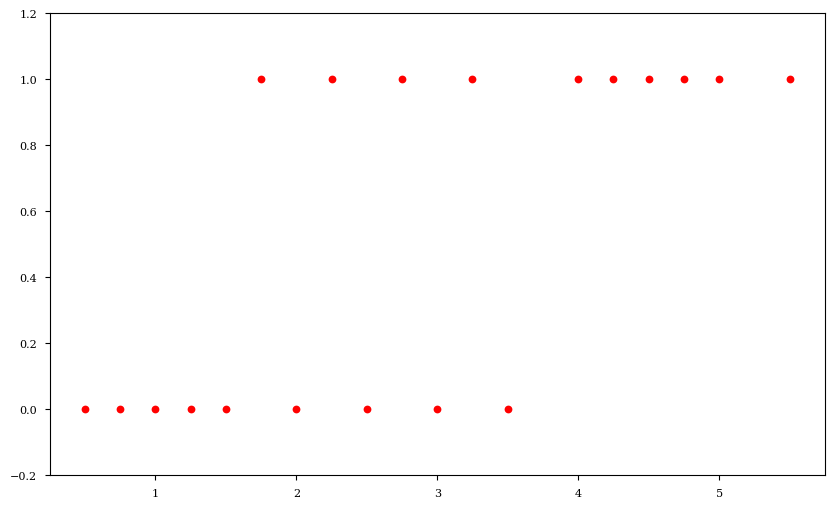

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2);

In [74]:
reg = np.polyfit(hours, success, deg=1)

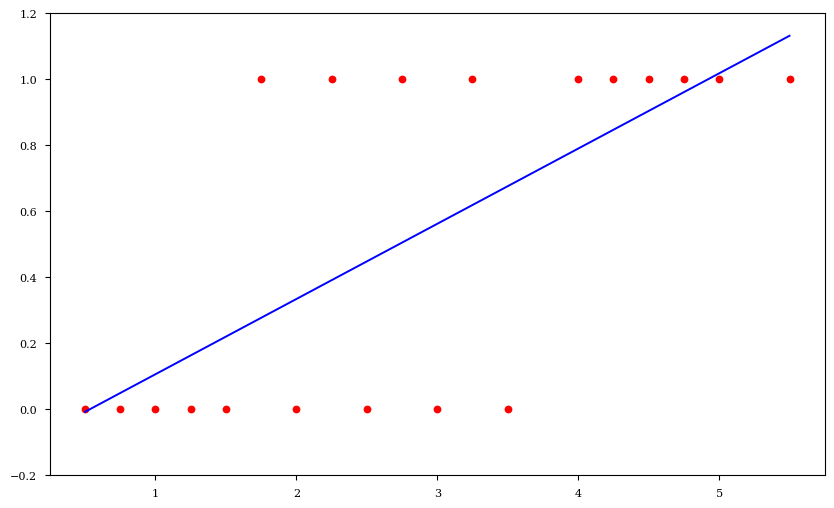

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2);

In [76]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [77]:
hrs = hours.reshape(1, -1).T

In [78]:
lm.fit(hrs, success)

LogisticRegression()

In [79]:
prediction = lm.predict(hrs)

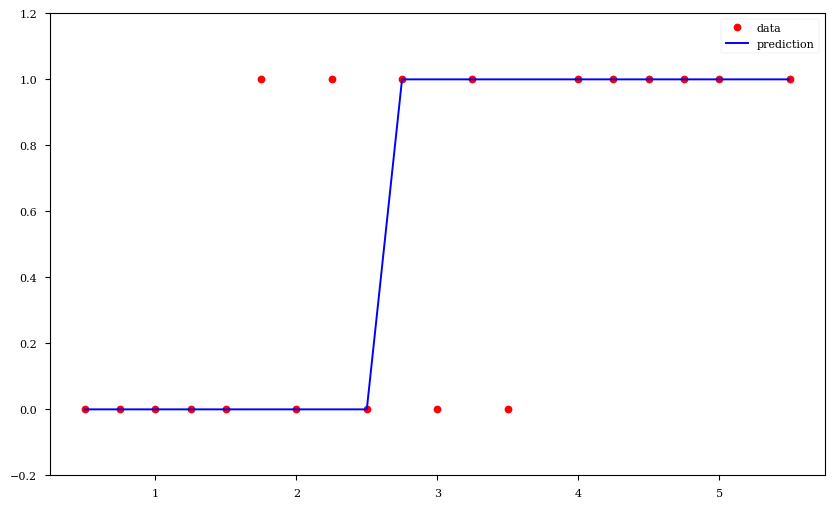

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2);

In [81]:
prob = lm.predict_proba(hrs)

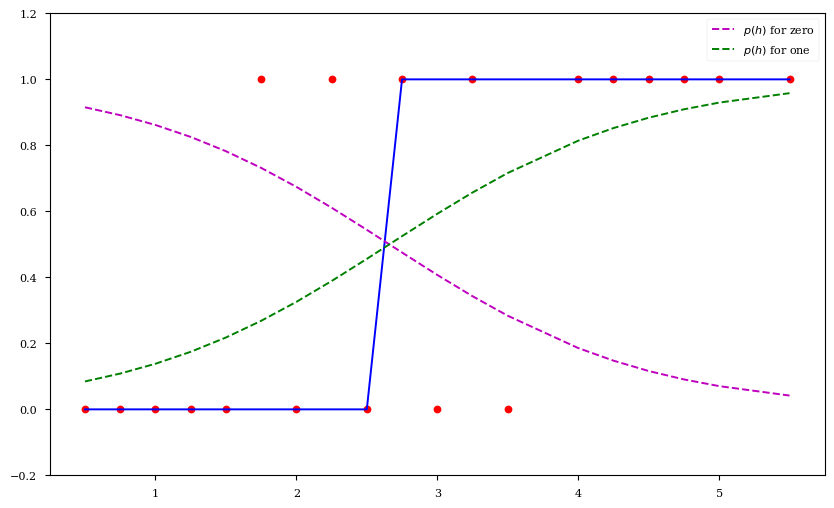

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--',
        label='$p(h)$ for zero')
plt.plot(hours,prob.T[1], 'g--',
        label='$p(h)$ for one')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0);

In [83]:
symbol = 'GLD'

In [84]:
data = pd.DataFrame(raw[symbol])

In [85]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [86]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [87]:
data.dropna(inplace=True)

In [88]:
lags = 3

In [89]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)

In [90]:
data.dropna(inplace=True)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                    multi_class='auto', max_iter=1000)

In [93]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [94]:
data['prediction'] = lm.predict(data[cols])

In [95]:
data['prediction'].value_counts()

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [96]:
hits = np.sign(data['return'].iloc[lags:] *
              data['prediction'].iloc[lags:]).value_counts()

In [97]:
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [98]:
accuracy_score(data['prediction'], np.sign(data['return']))

0.5338375796178344

In [99]:
data['strategy'] = data['prediction'] * data['return']

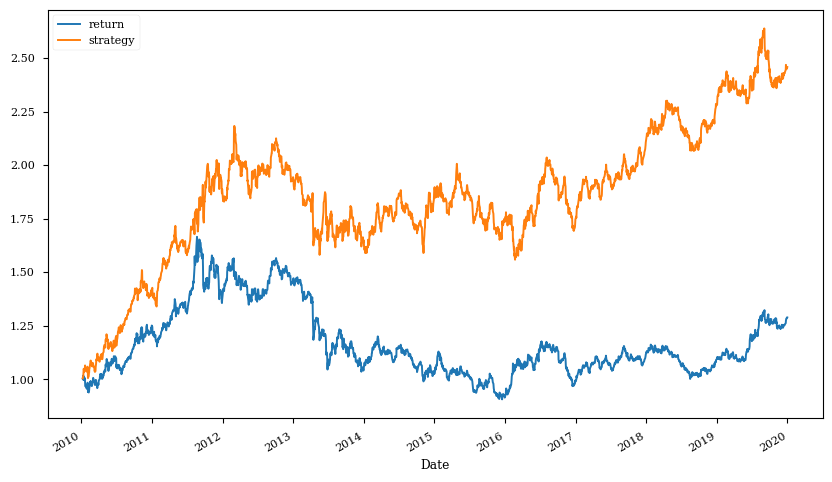

In [100]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [101]:
data = pd.DataFrame(raw[symbol])

In [102]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [103]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [104]:
lags = 5

In [105]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)

In [106]:
data.dropna(inplace=True)

In [107]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [108]:
data['prediction'] = lm.predict(data[cols])

In [109]:
data['prediction'].value_counts()

 1.0    2055
-1.0     456
Name: prediction, dtype: int64

In [110]:
hits = np.sign(data['return'].iloc[lags:] *
              data['prediction'].iloc[lags:]).value_counts()

In [111]:
hits

 1.0    1327
-1.0    1167
 0.0      12
dtype: int64

In [112]:
accuracy_score(data['prediction'], np.sign(data['return']))

0.5296694544006372

In [113]:
data['strategy'] = data['prediction'] * data['return']

In [114]:
data[['return', 'strategy']].sum().apply(np.exp)

return      1.283110
strategy    2.282757
dtype: float64

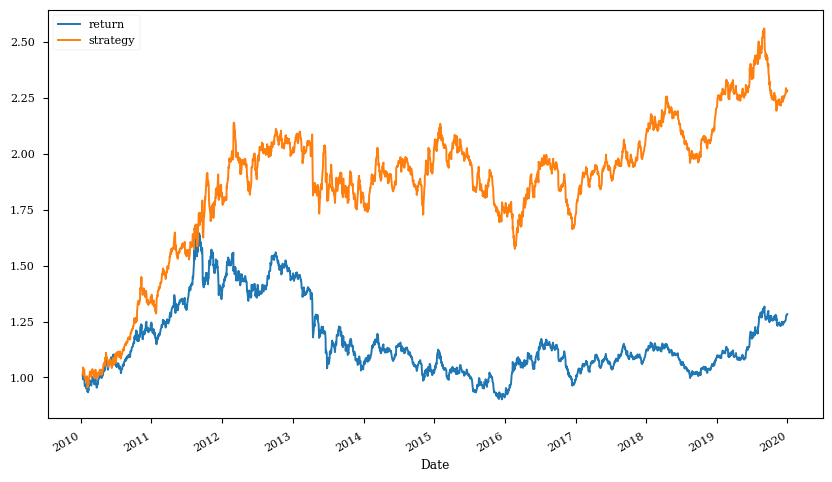

In [115]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [116]:
from sklearn_linear_strategy import SKVectorBacktester as SKVBT

In [117]:
skbt = SKVBT('EUR=', '2010-01-01', '2019-12-31', 10000, 0.0, 'logistic')

In [118]:
skbt.run_strategy('2015-01-01', '2019-12-31',
                 '2015-01-01', '2019-12-31', lags=15)

(11850.6, 1859.52)

In [119]:
skbt.run_strategy('2016-01-01', '2018-12-31',
                 '2019-01-01', '2019-12-31', lags=15)

(10551.26, 712.07)

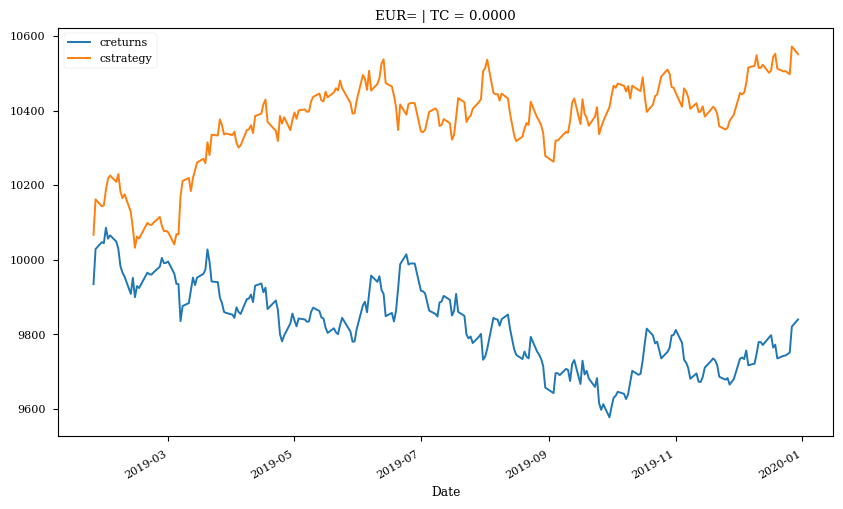

In [120]:
skbt.plot_results()

In [121]:
skbt = SKVBT('GDX', '2010-01-01', '2019-12-31',
            10000, 0.00, 'logistic')

In [122]:
skbt.run_strategy('2013-01-01', '2017-12-31',
                 '2018-01-01', '2018-12-31', lags=10)

(12988.58, 4535.57)

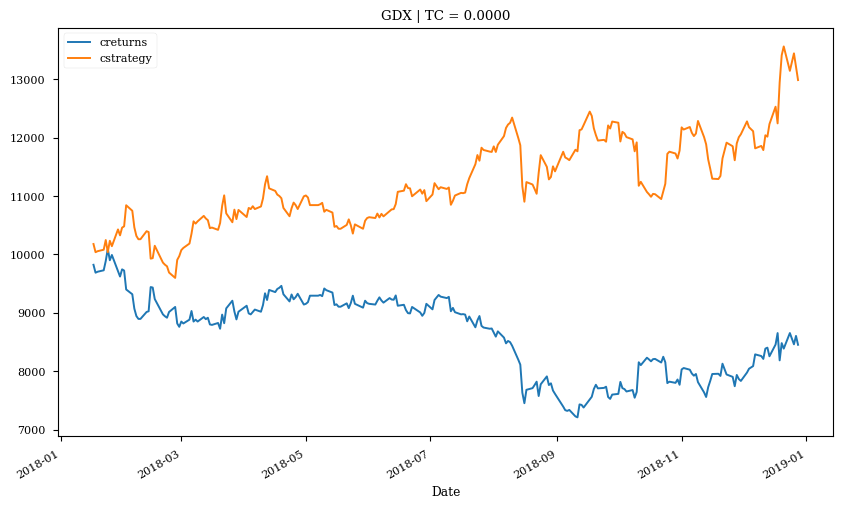

In [123]:
skbt.plot_results()

In [124]:
skbt = SKVBT('GDX', '2010-01-01', '2019-12-31',
            10000, 0.0025, 'logistic')

In [125]:
skbt.run_strategy('2013-01-01', '2017-12-31',
                 '2018-01-01', '2018-12-31', lags=10)

(9841.13, 1388.12)

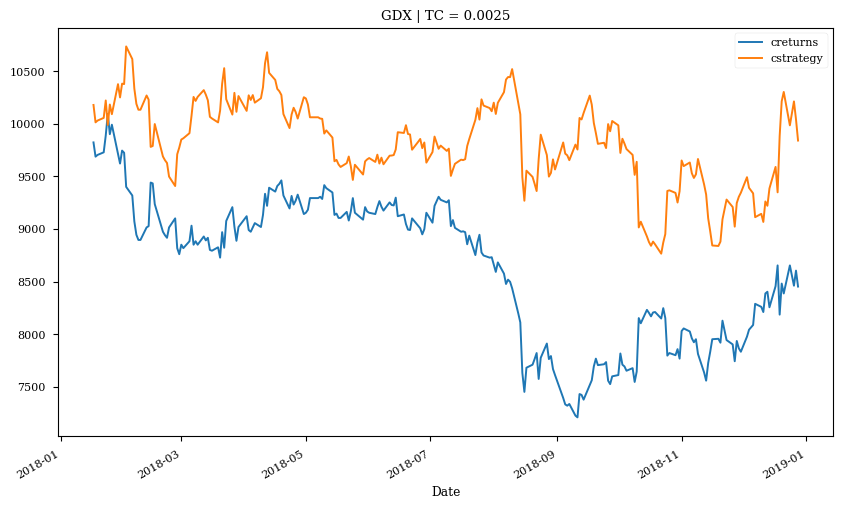

In [126]:
skbt.plot_results()

### Deep Learning

In [127]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2., 2.25, 2.5, 2.75, 3.,
       3.25, 3.5, 4., 4.25, 4.5 , 4.75, 5., 5.5])

In [128]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 1, 1, 1, 1, 1])

In [129]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hours    20 non-null     float64
 1   success  20 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 368.0 bytes


In [131]:
from sklearn.neural_network import MLPClassifier

In [134]:
model = MLPClassifier(hidden_layer_sizes=[32],
                     max_iter=1000, random_state=100)

In [135]:
model.fit(data['hours'].values.reshape(-1, 1), data['success'])

MLPClassifier(hidden_layer_sizes=[32], max_iter=1000, random_state=100)

In [138]:
data['prediction'] = model.predict(data['hours'].values.reshape(-1, 1))

In [139]:
data.tail()

,hours,success,prediction
15,4.25,1,1
16,4.50,1,1
17,4.75,1,1
18,5.00,1,1
19,5.50,1,1


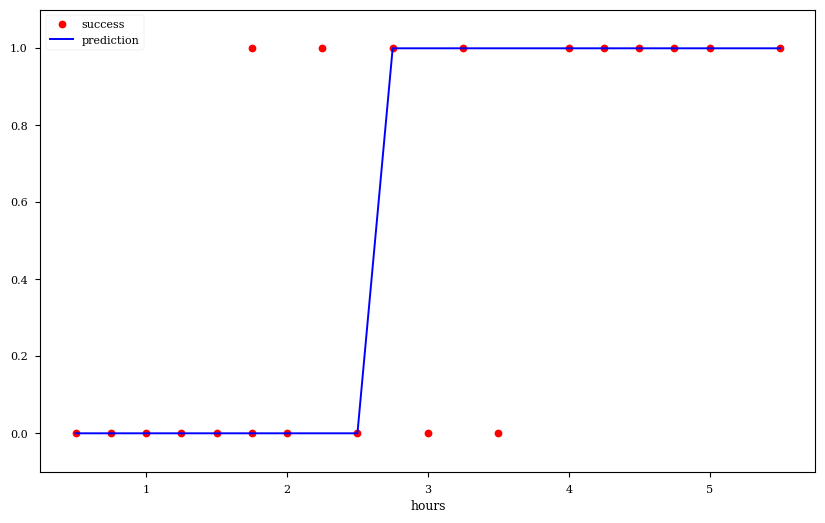

In [141]:
data.plot(x='hours', y=['success', 'prediction'],
         style=['ro', 'b-'], ylim=[-.1, 1.1], figsize=(10, 6));

In [142]:
symbol = 'EUR='

In [143]:
data = pd.DataFrame(raw[symbol])

In [144]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [145]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [146]:
data['direction'] = np.where(data['return'] > 0, 1, 0)

In [147]:
lags = 5

In [149]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [150]:
data.round(4).tail()

,price,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2019-12-24,1.1087,0.0001,1,0.0007,-0.0038,0.0008,-0.0034,0.0006
2019-12-26,1.1096,0.0008,1,0.0001,0.0007,-0.0038,0.0008,-0.0034
2019-12-27,1.1175,0.0071,1,0.0008,0.0001,0.0007,-0.0038,0.0008
2019-12-30,1.1197,0.0020,1,0.0071,0.0008,0.0001,0.0007,-0.0038
2019-12-31,1.1210,0.0012,1,0.0020,0.0071,0.0008,0.0001,0.0007


In [151]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop

In [152]:
optimizer = Adam(learning_rate=0.0001)